In [11]:
%run jupyterQ.ipynb
%run gates.ipynb
%run states.ipynb
%run coherence.ipynb

NameError: name 'TP' is not defined

NameError: name 'TP' is not defined

# Experimental tests of complementarity
We begin with a one-qubit state
\begin{equation}
\rho_{w,x} = w|\psi\rangle\langle\psi|+(1-w)\mathbb{I}_{2}/2,
\end{equation}
with $|\psi\rangle=\sqrt{x}|0\rangle+\sqrt{1-x}|1\rangle$.

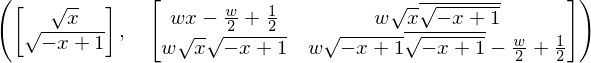

In [4]:
x,w=symbols('x w', positive=True, real=True)
psi = sqrt(x)*cb(2,0) + sqrt(1-x)*cb(2,1); rho = w*proj(psi)+(1-w)*id(2)/2
psi,rho

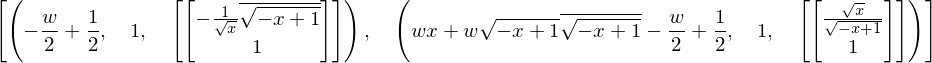

In [5]:
simplify(rho.eigenvects())

So, we have 
\begin{equation}
\rho = r_{0}|r_{0}\rangle\langle r_{0}|+r_{1}|r_{1}\rangle\langle r_{1}|
\end{equation}
with the eigenvalues given by
\begin{cases}
r_{0} = (1-w)/2, \\
r_{1} = (1+w)/2,
\end{cases}
and with the corresponding normalized eigenvectors given by
\begin{cases}
|r_{0}\rangle = -\sqrt{1-x}|0\rangle + \sqrt{x}|1\rangle, \\
|r_{1}\rangle = \sqrt{x}|0\rangle + \sqrt{1-x}|1\rangle.
\end{cases}

We can use the purification
\begin{align}
|\Phi\rangle_{AB} & = \sqrt{r_{0}}|r_{0}\rangle_{A}\otimes|0\rangle_{B} + \sqrt{r_{1}}|r_{1}\rangle_{A}\otimes|1\rangle_{B} \\
& = \sqrt{\frac{1-w}{2}}(-\sqrt{1-x}|0\rangle_{A} + \sqrt{x}|1\rangle_{A})\otimes|0\rangle_{B}+ \sqrt{\frac{1+w}{2}}(\sqrt{x}|0\rangle_{A} + \sqrt{1-x}|1\rangle_{A})\otimes|1\rangle_{B} \\
& \equiv (-\sqrt{1-x}|0\rangle_{A} + \sqrt{x}|1\rangle_{A})\otimes\sqrt{\frac{1-w}{2}}|0\rangle_{B}+ (\sqrt{x}|0\rangle_{A} + \sqrt{1-x}|1\rangle_{A})\otimes\sqrt{\frac{1+w}{2}}|1\rangle_{B},
\end{align}
which can be prepared experimentally using IBMQE gates as follows
\begin{equation}
|\Phi\rangle_{AB} = C_{Z}(B\rightarrow A)C_{X}(B\rightarrow A)U_{3}(\alpha,0,0)\otimes U_{3}(\theta,0,0)|0\rangle_{A}\otimes|0\rangle_{B}.
\end{equation}

In [2]:
print('pi = ', math.pi, ', pi/2 = ', math.pi/2)
w = np.arange(0,1.01,0.1); th = np.arccos(-w); print('th = ', th)
x = np.arange(0,1.01,0.1); al = 2*np.arcsin(np.sqrt(x)); print('al = ', al)

pi =  3.141592653589793 , pi/2 =  1.5707963267948966
th =  [1.57079633 1.67096375 1.77215425 1.87548898 1.98231317 2.0943951
 2.21429744 2.34619382 2.49809154 2.69056584 3.14159265]
al =  [0.         0.64350111 0.92729522 1.15927948 1.36943841 1.57079633
 1.77215425 1.98231317 2.21429744 2.49809154 3.14159265]


# Generalized Werner's states
\begin{equation}
\rho_{w,a} = (1-w)\frac{\mathbb{I}_{4}}{4}+w|\psi\rangle\langle\psi|,
\end{equation}
with $|\psi\rangle=\sqrt{a}|0\rangle+\sqrt{1-a}|1\rangle$.

In [6]:
w, a = symbols('w a',real=True,positive=True)
def werner_a(w,a):
    psi = sqrt(a)*tp(cb(2,0),cb(2,0)) + sqrt(1-a)*tp(cb(2,1),cb(2,1))
    return (1-w)*id(4)/4+w*proj(psi)

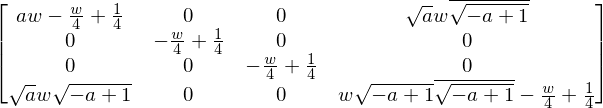

In [7]:
werner_a(w,a)

Using $|\psi\rangle=\sqrt{a/2}(|0\rangle+|1\rangle)+\sqrt{(1-a)/2}(|2\rangle+|3\rangle)$ we will obtain

In [8]:
w, a = symbols('w a',real=True,positive=True)
def werner_ap(w,a):
    psi = sqrt(a/2)*(tp(cb(2,0),cb(2,0))+tp(cb(2,0),cb(2,1))) 
    psi += sqrt((1-a)/2)*(tp(cb(2,1),cb(2,0))+tp(cb(2,1),cb(2,1)))#; psi
    return (1-w)*id(4)/4+w*proj(psi)

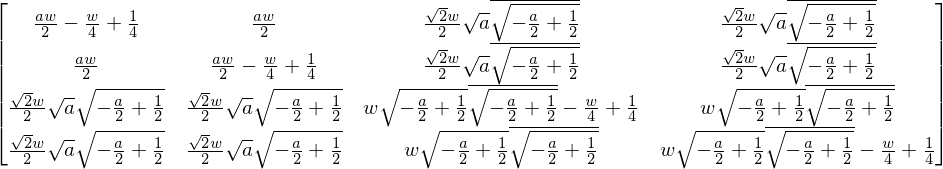

In [9]:
werner_ap(w,a)

## $l_{1}$-norm coherence-predictability duality relation

In [10]:
Cl1_Waw=coh_l1(4,werner_a(w,a)); simplify(Cl1_Waw)

NameError: name 'coh_l1' is not defined

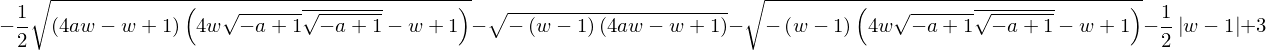

In [69]:
Pl1_Waw = predict_l1(4,werner_a(w,a)); simplify(Pl1_Waw)

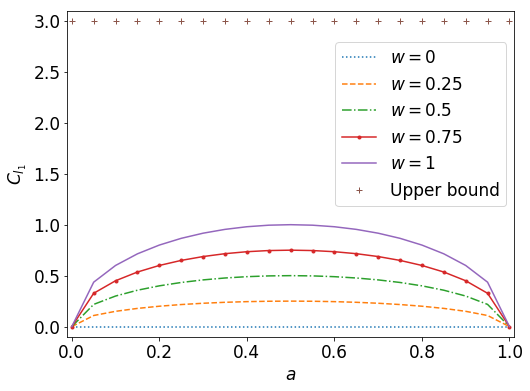

In [161]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_l1(4,werner_a(w,a[j]))
    w = 0.25; yw025[j] = coh_l1(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = coh_l1(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = coh_l1(4,werner_a(w,a[j]))
    w = 1; yw1[j] = coh_l1(4,werner_a(w,a[j]))
    ub[j] = 3
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.1,ub[0]+0.1)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+')
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{l_{1}}$'); plt.rcParams.update({'font.size': 17})
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(0.6,0.4))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_cl1.eps', 
            format='eps', dpi=100)
plt.show()

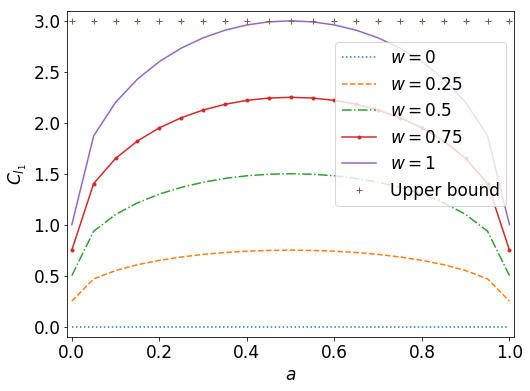

In [32]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_l1(4,werner_ap(w,a[j]))
    w = 0.25; yw025[j] = coh_l1(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = coh_l1(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = coh_l1(4,werner_ap(w,a[j]))
    w = 1; yw1[j] = coh_l1(4,werner_ap(w,a[j]))
    ub[j] = 3
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.1,ub[0]+0.1)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+')
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{l_{1}}$'); plt.rcParams.update({'font.size': 17})
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(0.6,0.4))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_cl1.eps', 
            format='eps', dpi=100)
plt.show()

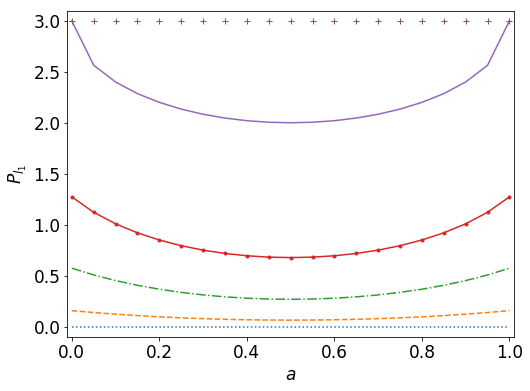

In [151]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = predict_l1(4,werner_a(w,a[j]))
    w = 0.25; yw025[j] = predict_l1(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = predict_l1(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = predict_l1(4,werner_a(w,a[j]))
    w = 1; yw1[j] = predict_l1(4,werner_a(w,a[j]))
    ub[j] = 3
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.1,ub[0]+0.1)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+')
plt.xlabel(r'$a$'); plt.ylabel(r'$P_{l_{1}}$'); plt.rcParams.update({'font.size': 17})
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_pl1.eps', 
            format='eps', dpi=100)
plt.show()

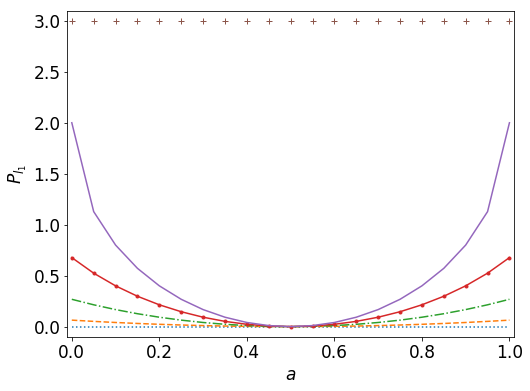

In [33]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = predict_l1(4,werner_ap(w,a[j]))
    w = 0.25; yw025[j] = predict_l1(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = predict_l1(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = predict_l1(4,werner_ap(w,a[j]))
    w = 1; yw1[j] = predict_l1(4,werner_ap(w,a[j]))
    ub[j] = 3
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.1,ub[0]+0.1)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+')
plt.xlabel(r'$a$'); plt.ylabel(r'$P_{l_{1}}$'); plt.rcParams.update({'font.size': 17})
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_pl1.eps', 
            format='eps', dpi=100)
plt.show()

\begin{equation}
C_{l_{1}}(\rho_{w,a})+P_{l_{1}}(\rho_{w,a})\le d-1=3
\end{equation}

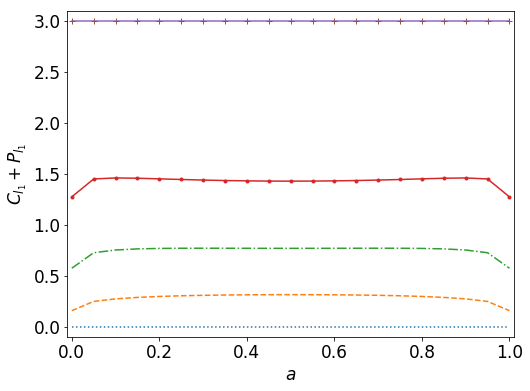

In [36]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_l1(4,werner_a(w,a[j])) + predict_l1(4,werner_a(w,a[j]))
    w = 0.25; yw025[j] = coh_l1(4,werner_a(w,a[j])) + predict_l1(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = coh_l1(4,werner_a(w,a[j])) + predict_l1(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = coh_l1(4,werner_a(w,a[j])) + predict_l1(4,werner_a(w,a[j]))
    w = 1; yw1[j] = coh_l1(4,werner_a(w,a[j])) + predict_l1(4,werner_a(w,a[j]))
    ub[j] = 3
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.1,ub[0]+0.1)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$',fontsize=17); plt.ylabel(r'$C_{l_{1}}+P_{l_{1}}$',fontsize=17)
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_cl1pl1.eps', 
            format='eps', dpi=100)
plt.show()

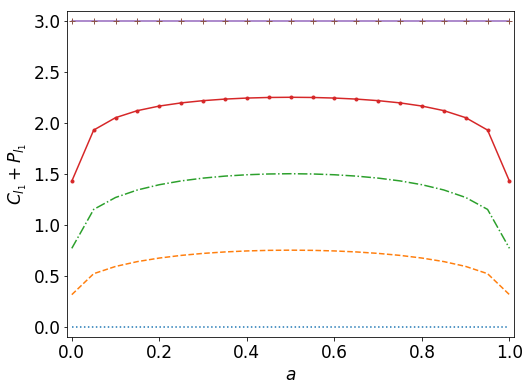

In [35]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_l1(4,werner_ap(w,a[j])) + predict_l1(4,werner_ap(w,a[j]))
    w = 0.25; yw025[j] = coh_l1(4,werner_ap(w,a[j])) + predict_l1(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = coh_l1(4,werner_ap(w,a[j])) + predict_l1(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = coh_l1(4,werner_ap(w,a[j])) + predict_l1(4,werner_ap(w,a[j]))
    w = 1; yw1[j] = coh_l1(4,werner_ap(w,a[j])) + predict_l1(4,werner_ap(w,a[j]))
    ub[j] = 3
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.1,ub[0]+0.1)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$',fontsize=17); plt.ylabel(r'$C_{l_{1}}+P_{l_{1}}$',fontsize=17)
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_cl1pl1.eps', 
            format='eps', dpi=100)
plt.show()

## Hilbert-Schmidt coherence-predictability duality relation

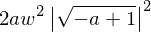

In [4]:
w, a = symbols('w a',real=True,positive=True); Chs_Waw=coh_hs(4,werner_a(w,a)); simplify(Chs_Waw)

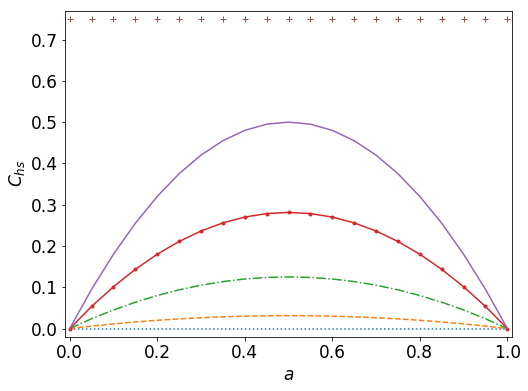

In [164]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_hs(4,werner_a(w,a[j]))
    w = 0.25; yw025[j] = coh_hs(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = coh_hs(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = coh_hs(4,werner_a(w,a[j]))
    w = 1; yw1[j] = coh_hs(4,werner_a(w,a[j]))
    ub[j] = (4-1)/4
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{hs}$'); plt.rcParams.update({'font.size': 17})
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_chs.eps', 
            format='eps', dpi=100)
plt.show()

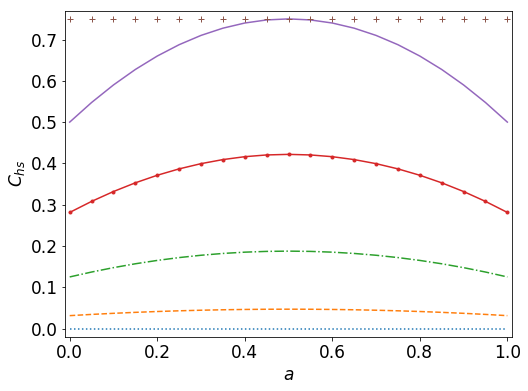

In [37]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_hs(4,werner_ap(w,a[j]))
    w = 0.25; yw025[j] = coh_hs(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = coh_hs(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = coh_hs(4,werner_ap(w,a[j]))
    w = 1; yw1[j] = coh_hs(4,werner_ap(w,a[j]))
    ub[j] = (4-1)/4
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{hs}$'); plt.rcParams.update({'font.size': 17})
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_chs.eps', 
            format='eps', dpi=100)
plt.show()

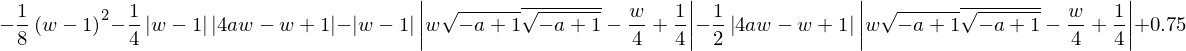

In [7]:
w, a = symbols('w a',real=True,positive=True); Phsl_Waw = predict_hs_l(4,werner_a(w,a)); simplify(Phsl_Waw)

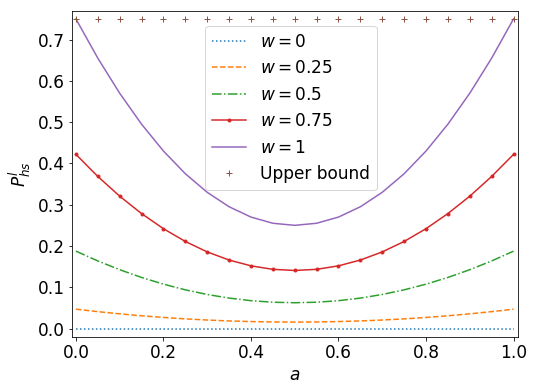

In [169]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = predict_hs_l(4,werner_a(w,a[j]))
    w = 0.25; yw025[j] = predict_hs_l(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = predict_hs_l(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = predict_hs_l(4,werner_a(w,a[j]))
    w = 1; yw1[j] = predict_hs_l(4,werner_a(w,a[j]))
    ub[j] = (4-1)/4
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$P_{hs}^{l}$'); plt.rcParams.update({'font.size': 17})
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(0.3,0.45))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_phsl.eps', 
            format='eps', dpi=100)
plt.show()

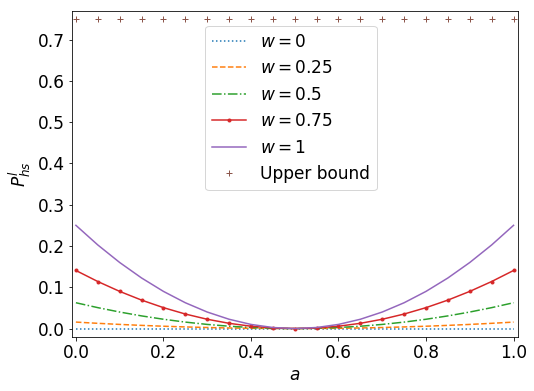

In [38]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = predict_hs_l(4,werner_ap(w,a[j]))
    w = 0.25; yw025[j] = predict_hs_l(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = predict_hs_l(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = predict_hs_l(4,werner_ap(w,a[j]))
    w = 1; yw1[j] = predict_hs_l(4,werner_ap(w,a[j]))
    ub[j] = (4-1)/4
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$P_{hs}^{l}$'); plt.rcParams.update({'font.size': 17})
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(0.3,0.45))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_phsl.eps', 
            format='eps', dpi=100)
plt.show()

\begin{equation}
C_{hs}(\rho_{w,a})+P_{hs}^{l}(\rho_{w,a})\le \frac{d-1}{d}=3/4
\end{equation}

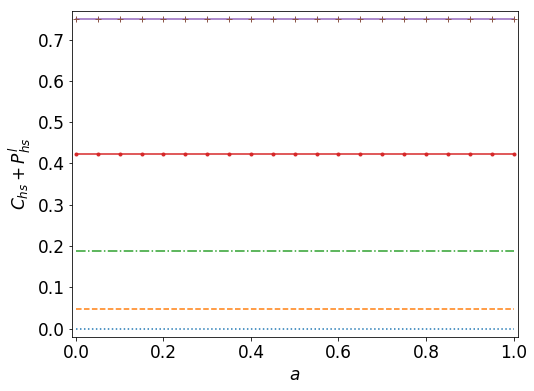

In [171]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 0.25; yw025[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 1; yw1[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    ub[j] = (4-1)/4
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{hs}+P_{hs}^{l}$')
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_chsphsl.eps', 
            format='eps', dpi=100)
plt.show()

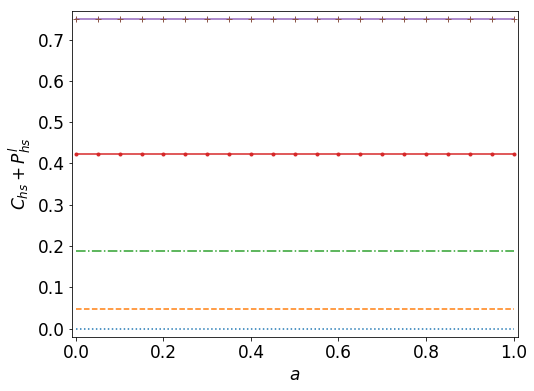

In [39]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_hs(4,werner_ap(w,a[j]))+predict_hs_l(4,werner_ap(w,a[j]))
    w = 0.25; yw025[j] = coh_hs(4,werner_ap(w,a[j]))+predict_hs_l(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = coh_hs(4,werner_ap(w,a[j]))+predict_hs_l(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = coh_hs(4,werner_ap(w,a[j]))+predict_hs_l(4,werner_ap(w,a[j]))
    w = 1; yw1[j] = coh_hs(4,werner_ap(w,a[j]))+predict_hs_l(4,werner_ap(w,a[j]))
    ub[j] = (4-1)/4
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{hs}+P_{hs}^{l}$')
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_chsphsl.eps', 
            format='eps', dpi=100)
plt.show()

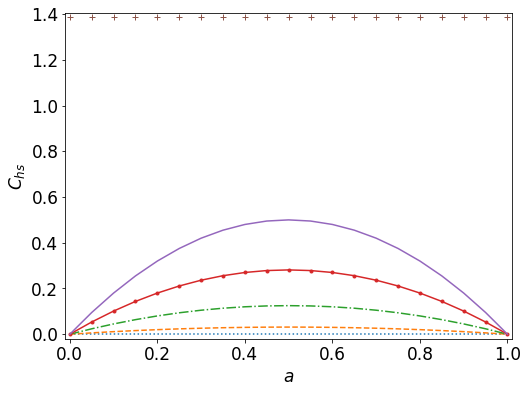

In [179]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_hs(4,werner_a(w,a[j]))
    w = 0.25; yw025[j] = coh_hs(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = coh_hs(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = coh_hs(4,werner_a(w,a[j]))
    w = 1; yw1[j] = coh_hs(4,werner_a(w,a[j]))
    ub[j] = ln(4)
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{hs}$'); plt.rcParams.update({'font.size': 17})
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_chs_.eps', 
            format='eps', dpi=100)
plt.show()

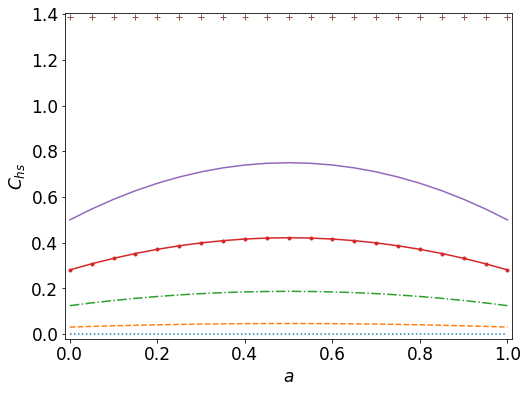

In [40]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_hs(4,werner_ap(w,a[j]))
    w = 0.25; yw025[j] = coh_hs(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = coh_hs(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = coh_hs(4,werner_ap(w,a[j]))
    w = 1; yw1[j] = coh_hs(4,werner_ap(w,a[j]))
    ub[j] = ln(4)
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{hs}$'); plt.rcParams.update({'font.size': 17})
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_chs_.eps', 
            format='eps', dpi=100)
plt.show()

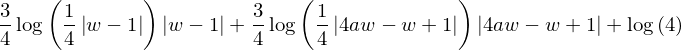

In [47]:
w, a = symbols('w a',real=True,positive=True); Phsvn_Waw = predict_hs_vn(4,werner_a(w,a)); simplify(Phsvn_Waw)

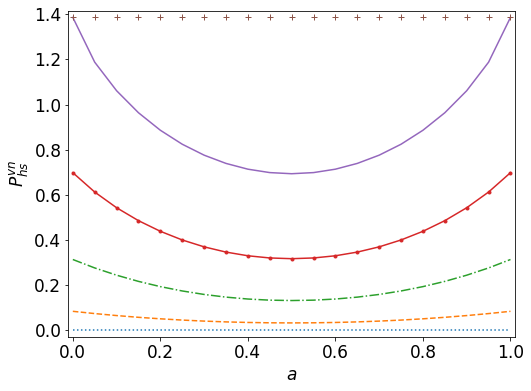

In [172]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = predict_hs_vn(4,werner_a(w,a[j]))#; print(log(4.),ln(4.),pw0[j])
    w = 0.25; yw025[j] = predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = predict_hs_vn(4,werner_a(w,a[j]))
    w = 1-10**-6; yw1[j] = predict_hs_vn(4,werner_a(w,a[j]))
    ub[j] = ln(4)
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.03,ub[0]+0.03)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$P_{hs}^{vn}$')
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=0.99$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_phsvn.eps', 
            format='eps', dpi=100)
plt.show()

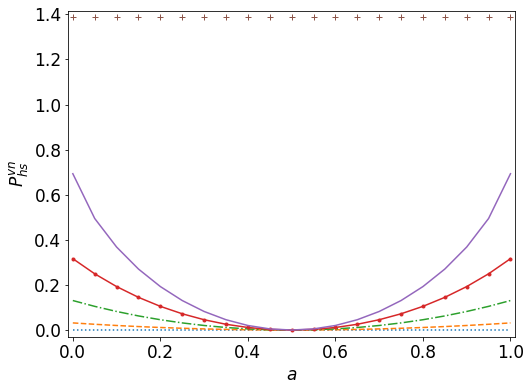

In [41]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = predict_hs_vn(4,werner_ap(w,a[j]))#; print(log(4.),ln(4.),pw0[j])
    w = 0.25; yw025[j] = predict_hs_vn(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = predict_hs_vn(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = predict_hs_vn(4,werner_ap(w,a[j]))
    w = 1-10**-6; yw1[j] = predict_hs_vn(4,werner_ap(w,a[j]))
    ub[j] = ln(4)
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.03,ub[0]+0.03)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$P_{hs}^{vn}$')
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=0.99$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_phsvn.eps', 
            format='eps', dpi=100)
plt.show()

\begin{equation}
C_{hs}(\rho_{w,a})+P_{hs}^{vn}(\rho_{w,a})\le \ln(d)=\ln(4)
\end{equation}

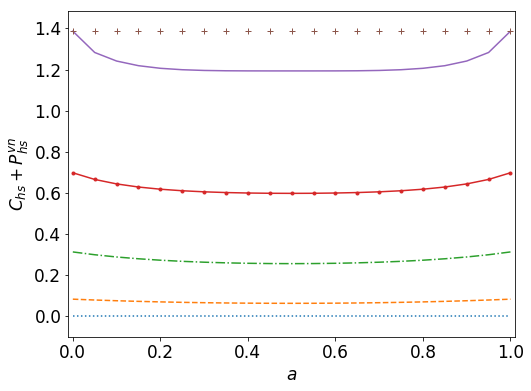

In [173]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.25; yw025[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 1-10**-6; yw1[j] = coh_hs(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    ub[j] = ln(4)
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.1,ub[0]+0.1)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{hs}+P_{hs}^{vn}$')
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_chsphsvn.eps', 
            format='eps', dpi=100)
plt.show()

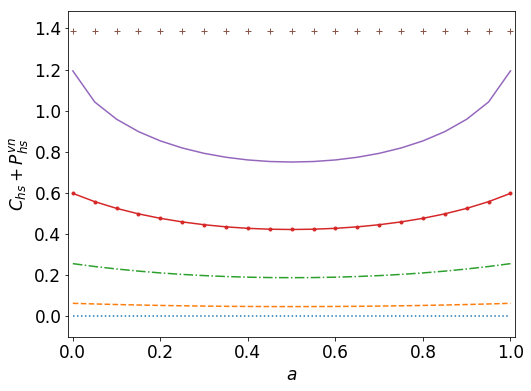

In [42]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_hs(4,werner_ap(w,a[j]))+predict_hs_vn(4,werner_ap(w,a[j]))
    w = 0.25; yw025[j] = coh_hs(4,werner_ap(w,a[j]))+predict_hs_vn(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = coh_hs(4,werner_ap(w,a[j]))+predict_hs_vn(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = coh_hs(4,werner_ap(w,a[j]))+predict_hs_vn(4,werner_ap(w,a[j]))
    w = 1-10**-6; yw1[j] = coh_hs(4,werner_ap(w,a[j]))+predict_hs_vn(4,werner_ap(w,a[j]))
    ub[j] = ln(4)
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.1,ub[0]+0.1)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{hs}+P_{hs}^{vn}$')
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_chsphsvn.eps', 
            format='eps', dpi=100)
plt.show()

## Wigner-Yanase coherence-predictability duality relation

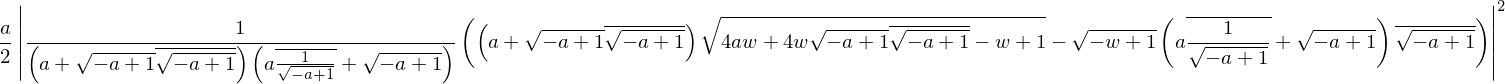

In [61]:
w, a = symbols('w a',real=True,positive=True); Cwy_Waw=coh_wy(4,werner_a(w,a)); simplify(Cwy_Waw)

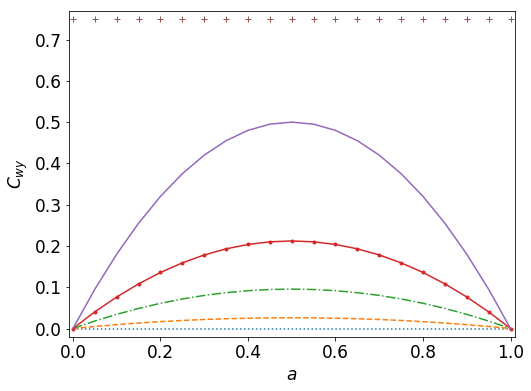

In [174]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_wy(4,werner_a(w,a[j]))
    w = 0.25; yw025[j] = coh_wy(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = coh_wy(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = coh_wy(4,werner_a(w,a[j]))
    w = 1; yw1[j] = coh_wy(4,werner_a(w,a[j]))
    ub[j] = (4-1)/4
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{wy}$')
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_cwy.eps', 
            format='eps', dpi=100)
plt.show()

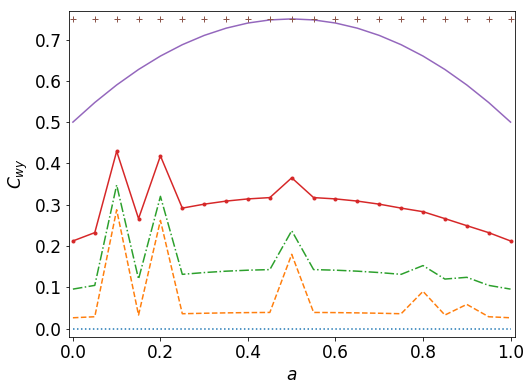

In [43]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_wy(4,werner_ap(w,a[j]))
    w = 0.25; yw025[j] = coh_wy(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = coh_wy(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = coh_wy(4,werner_ap(w,a[j]))
    w = 1; yw1[j] = coh_wy(4,werner_ap(w,a[j]))
    ub[j] = (4-1)/4
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{wy}$')
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_cwy.eps', 
            format='eps', dpi=100)
plt.show()

\begin{equation}
C_{wy}(\rho_{w,a})+P_{hs}^{l}(\rho_{w,a})\le \frac{d-1}{d}=3/4
\end{equation}

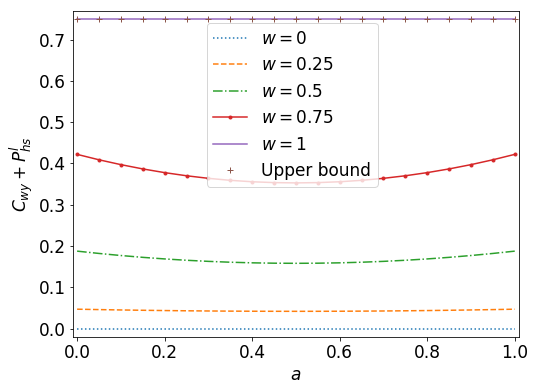

In [177]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_wy(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 0.25; yw025[j] = coh_wy(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = coh_wy(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = coh_wy(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    w = 1; yw1[j] = coh_wy(4,werner_a(w,a[j]))+predict_hs_l(4,werner_a(w,a[j]))
    ub[j] = (4-1)/4
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{wy}+P_{hs}^{l}$')
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(0.3,0.46))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_cwyphsl.eps', 
            format='eps', dpi=100)
plt.show()

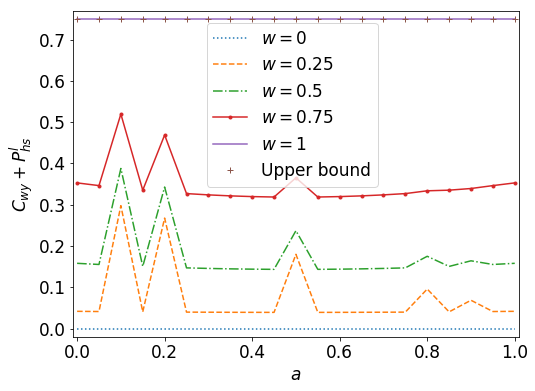

In [44]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_wy(4,werner_ap(w,a[j]))+predict_hs_l(4,werner_ap(w,a[j]))
    w = 0.25; yw025[j] = coh_wy(4,werner_ap(w,a[j]))+predict_hs_l(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = coh_wy(4,werner_ap(w,a[j]))+predict_hs_l(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = coh_wy(4,werner_ap(w,a[j]))+predict_hs_l(4,werner_ap(w,a[j]))
    w = 1; yw1[j] = coh_wy(4,werner_ap(w,a[j]))+predict_hs_l(4,werner_ap(w,a[j]))
    ub[j] = (4-1)/4
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{wy}+P_{hs}^{l}$')
plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(0.3,0.46))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_cwyphsl.eps', 
            format='eps', dpi=100)
plt.show()

\begin{equation}
C_{wy}(\rho_{w,a})+P_{hs}^{vn}(\rho_{w,a})\le \ln(d)=\ln(4)
\end{equation}

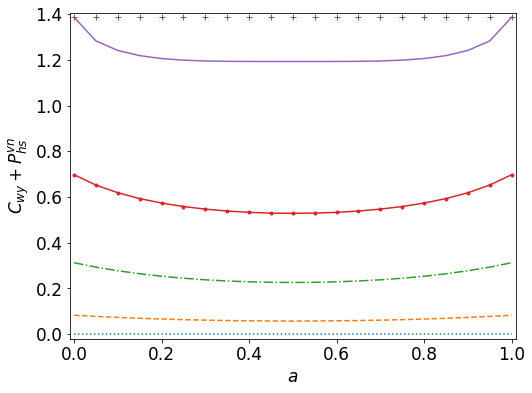

In [178]:
# werner_a
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_wy(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.25; yw025[j] = coh_wy(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.5; yw05[j] = coh_wy(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 0.75; yw075[j] = coh_wy(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    w = 1-10**-6; yw1[j] = coh_wy(4,werner_a(w,a[j]))+predict_hs_vn(4,werner_a(w,a[j]))
    ub[j] = ln(4)
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{wy}+P_{hs}^{vn}$')
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_cwyphsvn.eps', 
            format='eps', dpi=100)
plt.show()

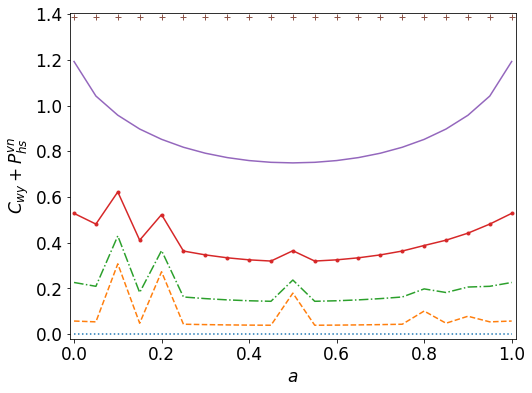

In [45]:
# werner_ap
a = np.arange(0,1.05,0.05); da = len(a); ub = np.zeros(da)
yw0 = np.zeros(da); yw025 = np.zeros(da); yw05 = np.zeros(da); yw075 = np.zeros(da); yw1 = np.zeros(da)
for j in range(0,da):
    w = 0; yw0[j] = coh_wy(4,werner_ap(w,a[j]))+predict_hs_vn(4,werner_ap(w,a[j]))
    w = 0.25; yw025[j] = coh_wy(4,werner_ap(w,a[j]))+predict_hs_vn(4,werner_ap(w,a[j]))
    w = 0.5; yw05[j] = coh_wy(4,werner_ap(w,a[j]))+predict_hs_vn(4,werner_ap(w,a[j]))
    w = 0.75; yw075[j] = coh_wy(4,werner_ap(w,a[j]))+predict_hs_vn(4,werner_ap(w,a[j]))
    w = 1-10**-6; yw1[j] = coh_wy(4,werner_ap(w,a[j]))+predict_hs_vn(4,werner_ap(w,a[j]))
    ub[j] = ln(4)
fig = plt.figure(figsize=(8,6)); plt.xlim(-0.01,1.01); plt.ylim(0-0.02,ub[0]+0.02)
plt.plot(a,yw0,':'); plt.plot(a,yw025,'--'); plt.plot(a,yw05,'-.'); plt.plot(a,yw075,'.-'); plt.plot(a,yw1,'-')
plt.plot(a,ub,'+'); plt.rcParams.update({'font.size': 17})
plt.xlabel(r'$a$'); plt.ylabel(r'$C_{wy}+P_{hs}^{vn}$')
#plt.legend((r'$w=0$',r'$w=0.25$',r'$w=0.5$',r'$w=0.75$',r'$w=1$','Upper bound'),loc=(1.01,0.5))
plt.savefig('/home/jonasmaziero/Dropbox/Research/qnesses/coherence/coeh_pop_tradeoff/calc/werner_cwyphsvn.eps', 
            format='eps', dpi=100)
plt.show()

# Other calcs

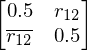

In [13]:
#x,y = symbols('x y', Real = True)
r12 = symbols('r12')
A = Matrix([[1/2,r12],[conjugate(r12),1/2]])
A

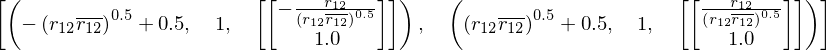

In [14]:
A.eigenvects()

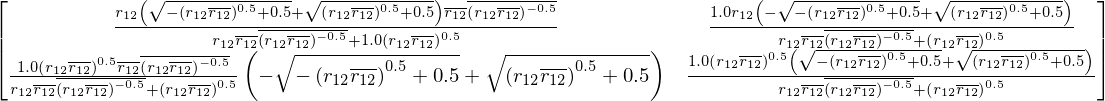

In [16]:
B = mat_sqrt(2,A)
simplify(B)

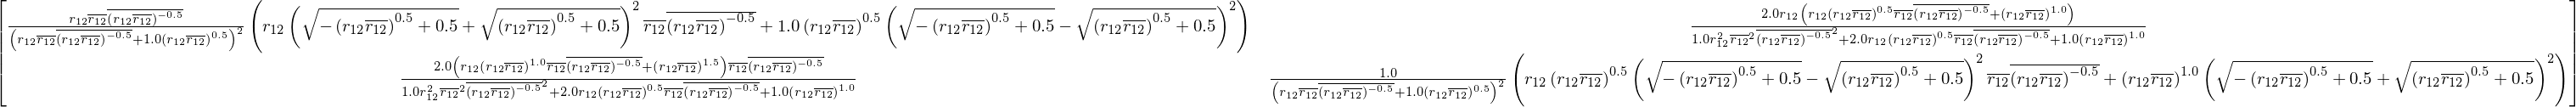

In [17]:
simplify(B*B)

In [18]:
def f(x,y):
    return (1+log(sqrt(x)))/sqrt(x) - (1+log(sqrt(y)))/sqrt(y)

In [25]:
x,y = symbols('x y')
x = 0
delt = 0.01
while x < 0.99:
    x += delt
    y = 0
    while y < x:
        y += delt
        if f(x,y) < 0:
        #if x > y:
            print(f(x,y))